In [11]:
import tensorflow as tf
import numpy as np

In [12]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [13]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

In [14]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [15]:
model = tf.keras.Sequential()

In [16]:
model.add(tf.keras.layers.Dense(units=1, input_dim=4))

In [17]:
model.add(tf.keras.layers.Activation('linear'))

In [18]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-5))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(x_data, y_data, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 168727085056.0000
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 185377123474346428988391424.0000
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: inf
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: inf
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: inf
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: inf
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: nan
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: nan
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: nan
Epoch 11/100
1/1 [==============================] - 0s 997us/step - loss: nan
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: nan
Epoch 13/100
1/1 [==============================] - 

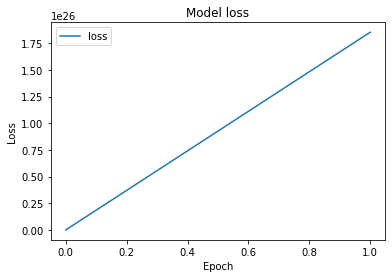

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()